In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('data/crossword.csv') #read in data
recent_week = df.tail(1)['Week'].item() #save recent week as string
df['Week'] = pd.to_datetime(df['Week']) #set field as datetime
#indicator for solving after Thurs
df['late_week'] = ((df.Thursday == 1) | (df.Friday == 1) | (df.Saturday) | (df.Sunday)).astype(int) 

In [3]:
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday','late_week']

df_totals = df[days].describe().T[['count','mean']]
df_totals['correct'] = (df_totals['count'] * df_totals['mean']).astype(int)

df_totals = df_totals[['correct','mean']]

In [4]:
recent_week

'5/2/22'

In [5]:
df.Monday.cumsum()

0        1
1        2
2        3
3        4
4        5
      ... 
167    163
168    164
169    165
170    166
171    167
Name: Monday, Length: 172, dtype: int64

In [6]:
#want cumulative totals

df_cumul = df[['WeekNum','Week']].copy()
df_cumul[days] = df.cumsum()[days]

df_running_avg = df_cumul[['WeekNum','Week']].copy()
for d in days:
    df_running_avg[d] = df_cumul[d]/df_cumul['WeekNum']
df_running_avg.tail()

,WeekNum,Week,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday,late_week
167,168,2022-04-04,0.970238,0.791667,0.458333,0.160714,0.113095,0.053571,0.113095,0.285714
168,169,2022-04-11,0.970414,0.792899,0.461538,0.165680,0.118343,0.053254,0.112426,0.289941
169,170,2022-04-18,0.970588,0.794118,0.464706,0.170588,0.117647,0.052941,0.117647,0.294118
170,171,2022-04-25,0.970760,0.795322,0.467836,0.175439,0.122807,0.052632,0.116959,0.298246
171,172,2022-05-02,0.970930,0.796512,0.470930,0.174419,0.122093,0.052326,0.122093,0.302326


In [7]:
#get rolling average
df_20 = df[days].rolling(20).mean()
df_52 = df[days].rolling(52).mean()

In [8]:
df_L20 = df_20.iloc[[df_20.shape[0]-21, df_20.shape[0]-1]].T
df_L20['L20'] = df_L20[df_20.shape[0]-1]
df_L20['Comp'] = df_L20[df_20.shape[0]-21]
df_L20['percent_diff'] = df_L20['L20']/df_L20['Comp'] - 1

df_L20

,151,171,L20,Comp,percent_diff
Monday,1.00,1.00,1.00,1.00,0.000000
Tuesday,1.00,0.95,0.95,1.00,-0.050000
Wednesday,0.75,0.90,0.90,0.75,0.200000
Thursday,0.45,0.70,0.70,0.45,0.555556
Friday,0.25,0.45,0.45,0.25,0.800000
Saturday,0.10,0.25,0.25,0.10,1.500000
Sunday,0.20,0.40,0.40,0.20,1.000000
late_week,0.60,0.95,0.95,0.60,0.583333


In [9]:
df_L20.iloc[0]

151             1.0
171             1.0
L20             1.0
Comp            1.0
percent_diff    0.0
Name: Monday, dtype: float64

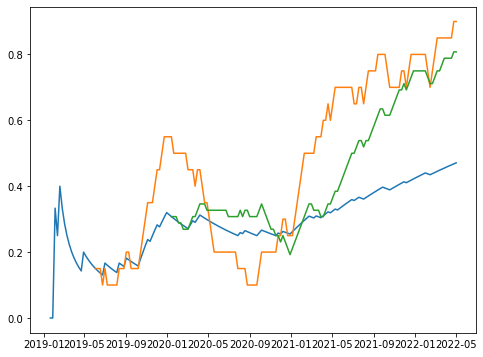

In [10]:
day = 'Wednesday'

fig = plt.figure(figsize=(8,6))
plt.plot(df.Week, df_running_avg[day])
plt.plot(df.Week, df_20[day])
plt.plot(df.Week, df_52[day])

In [33]:
#current streak
df_temp = pd.DataFrame()
df_temp['Current'] = df.Monday
df_temp['shifted'] = df.Monday.shift(1)
df_temp['StartStreak'] = df_temp['Current'] != df_temp['shifted']
df_temp['StreakId'] = df_temp['StartStreak'].cumsum()

#if its a 1
df_temp[df_temp['StreakId'] == df_temp['StreakId'].max()].shape[0]

#if its a 0 then 0

71

In [41]:
df_temp['Current'][df.shape[0]-1]

1

In [48]:
streak_dict = {}
for day in df.columns[2:]:
    df_temp = pd.DataFrame()
    df_temp['Current'] = df[day]
    df_temp['shifted'] = df[day].shift(1)
    df_temp['StartStreak'] = df_temp['Current'] != df_temp['shifted']
    df_temp['StreakId'] = df_temp['StartStreak'].cumsum()
    
    if df_temp['Current'][df.shape[0]-1] == 1: #if streak is active
        streak_dict[day] = df_temp[df_temp['StreakId'] == df_temp['StreakId'].max()].shape[0]

    elif df_temp['Current'][df.shape[0]-1] == 0: #if streak is inactive
        streak_dict[day] = 0
    else:
        print('Error')

streak_dict

{'Monday': 71,
 'Tuesday': 8,
 'Wednesday': 11,
 'Thursday': 0,
 'Friday': 0,
 'Saturday': 0,
 'Sunday': 1,
 'late_week': 4}

#### deleted lines from app
st.header('Total Correct Puzzles')
cols = st.columns(len(days)) 
for i in range(len(days)):
    with cols[i]:
        st.metric(days[i],int(df_totals.iloc[i]['total correct']))
        
st.header('Total Percetage Finished')
cols = st.columns(4) 
for i in range(4):
    with cols[i]:
        st.metric(days[i],"{:.0%}".format(df_totals.iloc[i]['mean']))
cols = st.columns(4) 
for i in range(4):
    with cols[i]:
        st.metric(days[i+4],"{:.0%}".format(df_totals.iloc[i+4]['mean']))